In [1]:
import numpy as np
from MixtureOptDesign import get_random_initial_design_mnl,CoordinateExchangeIOptimal,ClusteredCoordinateExchangeIOptimal

from MixtureOptDesign import (
    get_i_optimality_mnl,
    generate_beta_params,
    get_parameters,
    HaltonDraws,
    QMCHaltonDraws,
    get_random_initial_design_mnl,
    plot_ternary_design
)   

import MixtureOptDesign 


In [2]:
from MixtureOptDesign import generate_simplex_lattice_design, generate_initial_design,vns

In [3]:
lattice_design = generate_simplex_lattice_design(3,25)


In [4]:
lattice_design.shape

(351, 3)

In [5]:
plot_ternary_design(lattice_design.T.reshape(3,1,351))

In [7]:
beta = MixtureOptDesign.generate_beta_params(7,3)


In [8]:
# set up initial optimality value
best_optimality_value = float('inf')

In [9]:


for iteration in range(1):
    
    # set up flag variable
    success = False

    # loop until success is True
    while not success:
        try:
            # generate initial design
            initial_design, lattice_points, other_points = generate_initial_design(lattice_design)


            # calculate optimality value
            current_optimality_value = get_i_optimality_mnl(initial_design, 3, beta)
            
            # if no exception is raised, set success to True
            success = True
            
        except np.linalg.LinAlgError as e:
            print(f"Singular matrix: {e}")
        except ValueError:
            print("ValueError")
        except:
            print("Exception")
        
    # do something with i_opt_value if the code runs successfully
    if current_optimality_value < best_optimality_value and current_optimality_value >0 :
        
        best_optimality_value = current_optimality_value
        best_design = initial_design.copy()
        best_lattice_points = lattice_points.copy()
        best_other_points = other_points.copy()

In [10]:
def unique_rows(design:np.ndarray)->np.ndarray:
    q,j,s = design.shape
    arr = design.T.reshape(j*s,q)
    return np.unique(arr,axis=0)

In [11]:
best_design

array([[[0.64, 0.64, 0.28, 0.  , 0.32, 0.32, 0.  , 0.24, 0.28, 0.16,
         0.16, 0.  , 0.28, 0.  , 0.28, 0.  ],
        [0.48, 0.64, 0.24, 0.24, 0.64, 0.  , 0.48, 0.48, 0.  , 0.  ,
         0.32, 0.24, 0.64, 0.48, 0.  , 0.32]],

       [[0.  , 0.  , 0.32, 0.36, 0.2 , 0.2 , 0.08, 0.12, 0.32, 0.44,
         0.44, 0.08, 0.32, 0.84, 0.32, 0.36],
        [0.08, 0.2 , 0.12, 0.12, 0.  , 0.84, 0.08, 0.08, 0.36, 0.08,
         0.2 , 0.12, 0.2 , 0.08, 0.08, 0.2 ]],

       [[0.36, 0.36, 0.4 , 0.64, 0.48, 0.48, 0.92, 0.64, 0.4 , 0.4 ,
         0.4 , 0.92, 0.4 , 0.16, 0.4 , 0.64],
        [0.44, 0.16, 0.64, 0.64, 0.36, 0.16, 0.44, 0.44, 0.64, 0.92,
         0.48, 0.64, 0.16, 0.44, 0.92, 0.48]]])

In [29]:
unique_rows(best_design)

array([[0.  , 0.24, 0.76],
       [0.04, 0.  , 0.96],
       [0.2 , 0.64, 0.16],
       [0.2 , 0.68, 0.12],
       [0.28, 0.68, 0.04],
       [0.36, 0.56, 0.08],
       [0.48, 0.4 , 0.12],
       [0.48, 0.44, 0.08],
       [0.64, 0.16, 0.2 ],
       [0.76, 0.24, 0.  ]])

In [34]:
vns_desgin,vni_i_value = vns(best_design,best_other_points,beta)

Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!


In [35]:
vni_i_value

0.5332740289079182

In [36]:
unique_rows(vns_desgin)

array([[0.  , 0.  , 1.  ],
       [0.  , 0.52, 0.48],
       [0.  , 1.  , 0.  ],
       [0.32, 0.4 , 0.28],
       [0.44, 0.56, 0.  ],
       [0.52, 0.  , 0.48],
       [0.84, 0.16, 0.  ],
       [0.88, 0.  , 0.12]])

In [37]:
MixtureOptDesign.MNLVis.plot_ternary_design(vns_desgin)

In [38]:
beta = np.array((0.86, 0.21, 3.07, 2.34, 3.24, -20.59))

In [39]:
id_matrix = np.identity(7)
sigma_matrix = MixtureOptDesign.transform_varcov_matrix(id_matrix,3)

In [40]:
Sigma_prime = MixtureOptDesign.transform_varcov_matrix(id_matrix,3)
Sigma_prime

array([[2., 1., 0., 0., 0., 0.],
       [1., 2., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [41]:
draws = MixtureOptDesign.HaltonDraws(beta,sigma_matrix,128)
draws = draws.generate_draws()
draws.shape

(128, 6)

In [42]:
np.cov(draws.T)

array([[ 1.98067618,  0.90074196, -0.02668339, -0.00867566, -0.02727861,
        -0.04356336],
       [ 0.90074196,  1.85572306, -0.03910241, -0.06226417, -0.04581626,
        -0.03397161],
       [-0.02668339, -0.03910241,  1.00334998, -0.02436339, -0.02556245,
        -0.00473482],
       [-0.00867566, -0.06226417, -0.02436339,  0.97310663, -0.02585229,
        -0.03732686],
       [-0.02727861, -0.04581626, -0.02556245, -0.02585229,  0.97254625,
        -0.04516292],
       [-0.04356336, -0.03397161, -0.00473482, -0.03732686, -0.04516292,
         0.9247679 ]])

In [43]:
draw_q = MixtureOptDesign.QMCHaltonDraws(beta,sigma_matrix,128)

In [44]:
draw_q = draw_q.generate_draws()

In [45]:
np.cov(draw_q.T)

array([[ 2.00768687e+00,  1.01018956e+00, -1.00207127e-02,
         3.56250980e-02, -6.49785258e-03,  9.95011773e-02],
       [ 1.01018956e+00,  1.98531323e+00, -5.15060871e-02,
         2.14842370e-02, -1.53722295e-02,  8.64759961e-02],
       [-1.00207127e-02, -5.15060871e-02,  1.00220451e+00,
         1.94580847e-02, -1.53622585e-03, -2.29298419e-02],
       [ 3.56250980e-02,  2.14842370e-02,  1.94580847e-02,
         1.01112820e+00,  1.14187127e-02,  4.11039451e-02],
       [-6.49785258e-03, -1.53722295e-02, -1.53622585e-03,
         1.14187127e-02,  1.04247578e+00,  3.73243148e-02],
       [ 9.95011773e-02,  8.64759961e-02, -2.29298419e-02,
         4.11039451e-02,  3.73243148e-02,  9.72255745e-01]])

In [49]:
import matplotlib.pyplot as plt

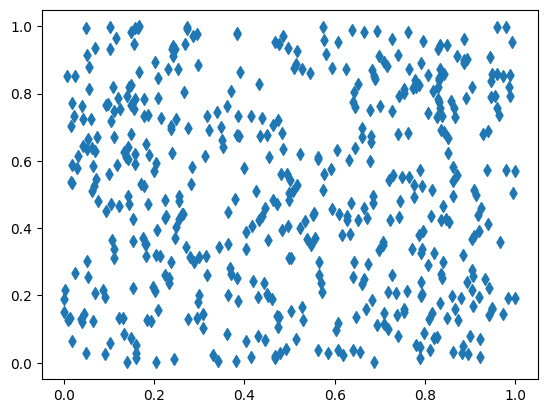

In [50]:
n = 500
x1 = np.random.uniform(0,1,int(n))
x2 = np.random.uniform(0,1,int(n))

plt.scatter(x1,x2, marker='d')

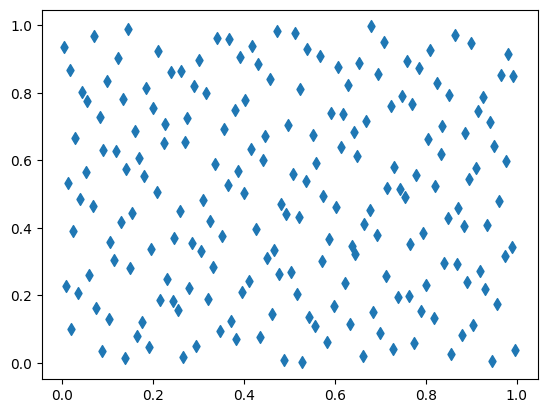

In [51]:
from scipy.stats import qmc

def halton(n, d=1):
    sampler = qmc.Halton(d, scramble=True)
    return sampler.random(n)

def halton_norm(n, d=1):
    sampler = qmc.Halton(d, scramble=True)
    x_halton = sampler.random(n)
    return stats.norm.ppf(x_halton)
    
x = halton(n=200, d=2).T
plt.scatter(x[0],x[1], marker='d')